In [1]:
import numpy as np
rng = np.random.default_rng(0)
n, p, q = 200, 8, 3
X = rng.standard_normal((n, p))
Y = rng.standard_normal((n, q))

In [2]:
from glmnet import MultiGaussNet
nlambda = 7
L = MultiGaussNet(nlambda=nlambda)
L.fit(X, Y)


MultiGaussNet(lambda_values=None, lambda_fractional=True, alpha=1.0, lower_limits=array([-9.9e+35, -9.9e+35, -9.9e+35, -9.9e+35, -9.9e+35, -9.9e+35,
       -9.9e+35, -9.9e+35]), upper_limits=array([9.9e+35, 9.9e+35, 9.9e+35, 9.9e+35, 9.9e+35, 9.9e+35, 9.9e+35,
       9.9e+35]), penalty_factor=array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]]), fit_intercept=True, standardize=True, family=GLMFamilySpec(base=<statsmodels.genmod.families.family.Gaussian object at 0x104b46ec0>), control=GLMNetControl(thresh=1e-07, maxit=100000, big=9.9e+35, logging=False, mxitnr=25, epsnr=1e-06, fdev=1e-05), regularized_estimator=<class 'glmnet.paths.regularized_glm.RegGLM'>, lambda_min_ratio=0.0001, nlambda=7, df_max=9, standardize_response=False, univariate_beta=True, type_logistic='Newton')

In [3]:
import rpy2
%load_ext rpy2.ipython
%R -i X,Y,nlambda

In [4]:
X[0]

array([ 0.12573022, -0.13210486,  0.64042265,  0.10490012, -0.53566937,
        0.36159505,  1.30400005,  0.94708096])


Call:  glmnet(x = X, y = Y, family = "mgaussian", nlambda = nlambda) 

  Df %Dev   Lambda
1  0 0.00 0.152000
2  8 2.82 0.032740
3  8 3.06 0.007054
4  8 3.07 0.001520
5  8 3.07 0.000327


Loading required package: Matrix
Loaded glmnet 4.1-8


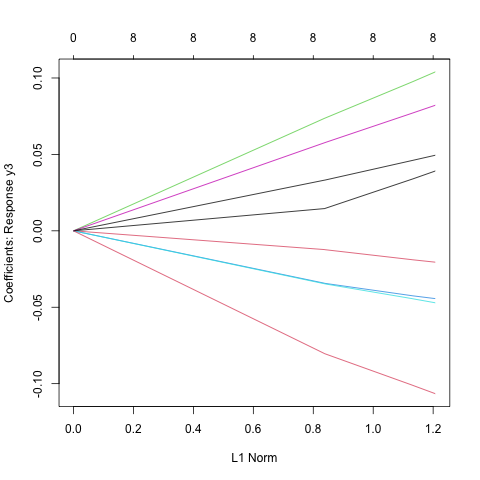

In [5]:
%%R
library(glmnet)
G = glmnet(X, Y, family='mgaussian', nlambda=nlambda)
plot(G)
G

In [6]:
#ax = L.plot_coefficients(xvar='norm')

In [7]:
L.summary_

,Degrees of Freedom,Fraction Deviance Explained
lambda,,
9.900000e+35,0,0.000000
3.274018e-02,8,0.028233
7.053658e-03,8,0.030612
1.519664e-03,8,0.030723
3.274018e-04,8,0.030728


In [8]:
%%R -o C_R1,C_R2,C_R3,I_R1,I_R2,I_R3
C_R1 = as.matrix(coef(G)$y1)[-1,]
C_R2 = as.matrix(coef(G)$y2)[-1,]
C_R3 = as.matrix(coef(G)$y3)[-1,]
I_R1 = as.matrix(coef(G)$y1)[1,]
I_R2 = as.matrix(coef(G)$y2)[1,]
I_R3 = as.matrix(coef(G)$y3)[1,]


In [9]:
C_R = np.concatenate([C_R1.T[:,:,None], C_R2.T[:,:,None], C_R3.T[:,:,None]], axis=2)
C_R.shape

(5, 8, 3)

In [10]:
np.linalg.norm(C_R - L.coefs_) / np.linalg.norm(L.coefs_)

6.912366121602008e-16

In [11]:
I_R = np.array([I_R1,
                I_R2,
                I_R3])
np.linalg.norm(I_R.T - L.intercepts_) / np.linalg.norm(L.intercepts_)

4.275803733978298e-16

In [12]:
L.intercepts_.shape, L.coefs_.shape

((5, 3), (5, 8, 3))

In [13]:
I_R.T

array([[ 0.00237267, -0.11412975, -0.11667125],
       [-0.0067826 , -0.1197247 , -0.099763  ],
       [-0.00853881, -0.12127891, -0.09549218],
       [-0.00893242, -0.12158061, -0.09456818],
       [-0.00901789, -0.12164394, -0.09436892]])